# Task 1

In [4]:
### 1.1 ###
import pandas as pd
from scipy.io import arff

### 1.2 ###
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

### 1.3 ###
from sklearn.preprocessing import MinMaxScaler

### 1.4 ###
from sklearn.model_selection import train_test_split

### 1.5 ###
import numpy as np

### 1.1)  Convert the arff file into .CSV 

In [5]:
data = arff.loadarff('data_arff.arff')
data= pd.DataFrame(data[0])
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'


In [6]:
data.to_csv('data.csv')

### 1.2) Load the dataset

In [7]:
data = pd.read_csv('data.csv')
data = data.drop('Unnamed: 0',axis=1)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'


In [8]:
print(f"There are {data.shape[0]} Rows and {data.shape[1]} Columns in Data set")

There are 1151 Rows and 20 Columns in Data set


In [9]:
# get the how many time each values appear in the dataset
data['0'].value_counts()

# we will remove this column beacuse it does gave much information for prediction

1.0    1147
0.0       4
Name: 0, dtype: int64

In [10]:
data['1'].value_counts()

1.0    1057
0.0      94
Name: 1, dtype: int64

In [11]:
data['18'].value_counts()

0.0    764
1.0    387
Name: 18, dtype: int64

In [12]:
data['Class'].value_counts()

b'1'    611
b'0'    540
Name: Class, dtype: int64

In [13]:
print("1" in "b'1'")
print("1" in "b'0'")

True
False


In [14]:
data['Class'] = data['Class'].apply(lambda x:1 if "1" in x else 0)

In [15]:
data['Class'].value_counts()

1    611
0    540
Name: Class, dtype: int64

In [16]:
#  separate the input features and class labels
features = data.drop('Class',axis=1)
target = data[['Class']]

In [17]:
def plot_dist(data,col):
    plt.figure(figsize=(10,5))
    sns.kdeplot(data[col],shade=True)

In [1]:
# for col in features.columns:
#     plot_dist(data,col)

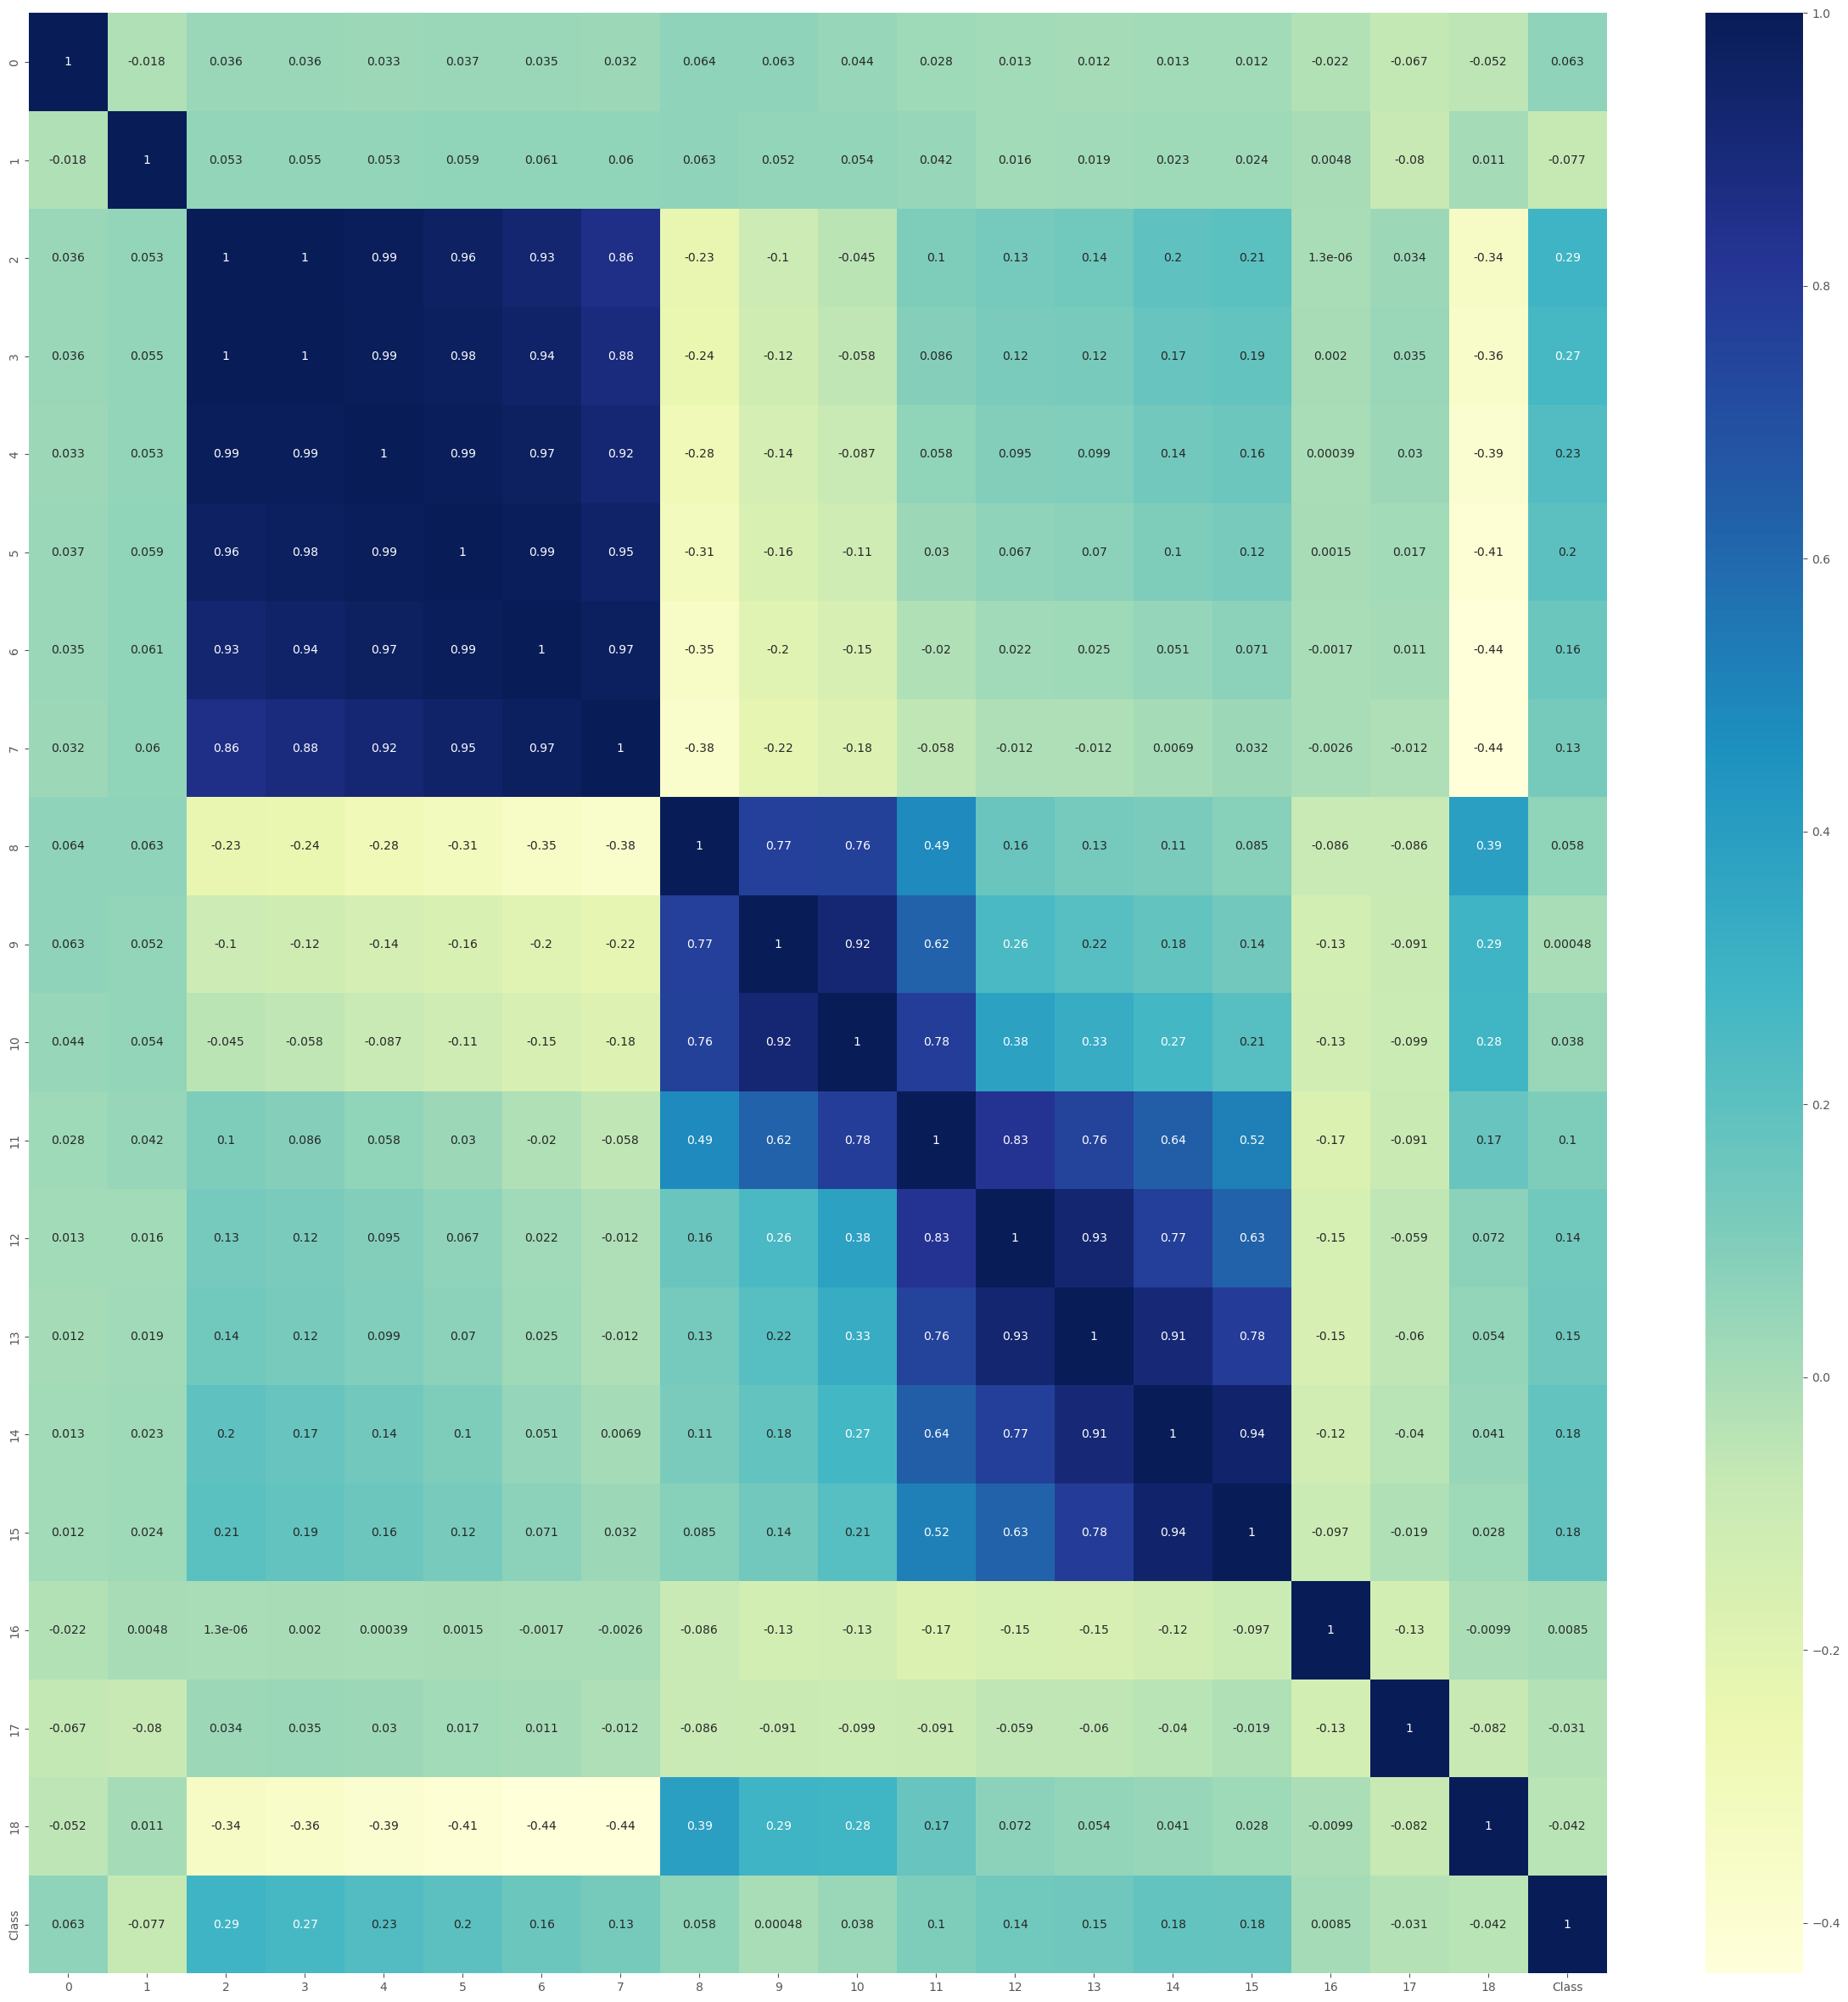

In [19]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),cmap="YlGnBu", annot=True)
plt.show()

In [20]:
features = features.drop('0',axis=1)
features.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0
1,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0
2,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0
3,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0
4,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0


### 1.3) Normalize the features

In [21]:
scaler = MinMaxScaler()

In [22]:
scaled_data = scaler.fit_transform(features)
scaled_data = pd.DataFrame(scaled_data,columns=features.columns)

In [23]:
scaled_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,0.140000,0.160305,0.176471,0.173077,0.177083,0.147727,0.122764,0.106359,0.049693,0.012913,0.000362,0.000342,0.000661,0.001271,0.530801,0.261133,1.0
1,1.0,0.153333,0.175573,0.176471,0.163462,0.156250,0.136364,0.142126,0.142403,0.031351,0.003918,0.000076,0.000194,0.000657,0.001264,0.682302,0.536341,0.0
2,1.0,0.406667,0.450382,0.487395,0.509615,0.479167,0.363636,0.137472,0.167497,0.119614,0.081188,0.027106,0.018571,0.007043,0.002509,0.726836,0.437973,0.0
3,1.0,0.360000,0.396947,0.436975,0.471154,0.437500,0.340909,0.099403,0.110368,0.085971,0.051525,0.016340,0.013555,0.001289,0.000496,0.514678,0.352675,0.0
4,1.0,0.286667,0.328244,0.361345,0.384615,0.395833,0.295455,0.043799,0.051281,0.003869,0.000000,0.000000,0.000000,0.000000,0.000000,0.481936,0.407122,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1.0,0.220000,0.251908,0.277311,0.307692,0.312500,0.261364,0.014179,0.005609,0.000294,0.000052,0.000000,0.000000,0.000000,0.000000,0.756089,0.365106,0.0
1147,1.0,0.320000,0.366412,0.403361,0.461538,0.458333,0.409091,0.155722,0.163809,0.076060,0.016390,0.000030,0.000000,0.000000,0.000000,0.663701,0.410954,0.0
1148,0.0,0.320000,0.358779,0.394958,0.423077,0.437500,0.363636,0.074612,0.083569,0.016624,0.002307,0.000218,0.000000,0.000000,0.000000,0.859281,0.446002,0.0
1149,1.0,0.253333,0.267176,0.235294,0.211538,0.125000,0.068182,0.099548,0.075419,0.044696,0.018030,0.010958,0.016263,0.040346,0.056559,0.526653,0.302456,1.0


### 1.4) Split Data set

In [24]:
target.values.squeeze().shape

(1151,)

In [25]:
x_train,x_test,y_train,y_test = train_test_split(scaled_data.values,target.values.squeeze(),test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((920, 18), (231, 18), (920,), (231,))

### 1.5) Construct a 3-layers feedforward network
### 1.6)  train and test the neural network using the Backpropagation

In [26]:
x_train = x_train.T
x_test = x_test.T

Our NN will have a simple two-layer architecture. Input layer $a^{[0]}$ will have 18 units corresponding to the 18 feature in our data set. A hidden layer $a^{[1]}$ will have 20 units with ReLU activation, and finally our output layer $a^{[2]}$ will have a unit to get the output with activation sigmoid.

**Forward propagation**

$$Z^{[1]} = W^{[1]} X + b^{[1]}$$
$$A^{[1]} = g_{\text{ReLU}}(Z^{[1]}))$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = g_{\text{sigmoid}}(Z^{[2]})$$

**Backward propagation**

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$

In [27]:
INPUT_SHAPE = 18
HIDDEN_SIZE = 20
OUTPUT = 1
LR = 0.1
epochs = 2000

In [28]:
# Define sigmoid activation function
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))

# Define derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

In [36]:
def init_params(input_shape=18, hidden_size=20, output_size=1):
    W1 = np.random.rand(hidden_size, input_shape) 
    b1 = np.random.rand(hidden_size, 1) 
    W2 = np.random.rand(output_size, hidden_size) 
    b2 = np.random.rand(output_size, 1) 
    return W1, b1, W2, b2

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = X.shape[1]
    dZ2 = A2 - Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2,axis=1)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    
    return dW1, db1, dW2, db2
    

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

def calculate_cost(A2, Y):
    m = len(Y)
    cost = -np.sum(np.multiply(Y, np.log(A2)) +  np.multiply(1-Y, np.log(1-A2))) /m
    cost = np.squeeze(cost)
    return cost

def get_accuracy(y_true, y_pred):
    correct = 0
    total = len(y_true)
    
    for i in range(total):
        if y_true[i] == y_pred[i]:
            correct += 1
    
    accuracy = correct / total
    
    return accuracy

def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    A2 = np.round(A2).squeeze()
    return A2

In [37]:
def gradient_descent(X, Y, alpha, iterations,input_shape, hidden_size, output_size):
    history = {"epoch":[],"loss":[],"accuracy":[]}
    W1, b1, W2, b2 = init_params(input_shape, hidden_size, output_size)
     
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)        
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        cost = calculate_cost(A2,Y)
        A2 = np.round(A2).squeeze()
        accuracy = get_accuracy(Y,A2)
        history['loss'].append(cost)
        history['epoch'].append(i)
        history['accuracy'].append(accuracy)
        if i % 100 == 0:
            print("Iteration: ", i)
            print("Cost is : ",cost)
            print("Accuracy is :",accuracy)
            print('################ \n')
    return W1, b1, W2, b2,history

In [38]:
W1, b1, W2, b2,history = gradient_descent(x_train, y_train, LR,epochs,
                          input_shape=INPUT_SHAPE, hidden_size=HIDDEN_SIZE, output_size=OUTPUT)

C:\Users\Ahmed-Basem\AppData\Local\Temp\ipykernel_28200\2597865180.py:36: RuntimeWarning: divide by zero encountered in log
  cost = -np.sum(np.multiply(Y, np.log(A2)) +  np.multiply(1-Y, np.log(1-A2))) /m
C:\Users\Ahmed-Basem\AppData\Local\Temp\ipykernel_28200\2597865180.py:36: RuntimeWarning: invalid value encountered in multiply
  cost = -np.sum(np.multiply(Y, np.log(A2)) +  np.multiply(1-Y, np.log(1-A2))) /m


Iteration:  0
Cost is :  nan
Accuracy is : 0.525
################ 

Iteration:  100
Cost is :  0.6570196674576212
Accuracy is : 0.592391304347826
################ 

Iteration:  200
Cost is :  0.6493083966237562
Accuracy is : 0.6021739130434782
################ 

Iteration:  300
Cost is :  0.6431409004271832
Accuracy is : 0.6184782608695653
################ 

Iteration:  400
Cost is :  0.637831377669609
Accuracy is : 0.6228260869565218
################ 

Iteration:  500
Cost is :  0.6326428171665196
Accuracy is : 0.6271739130434782
################ 

Iteration:  600
Cost is :  0.6274303769333128
Accuracy is : 0.6293478260869565
################ 

Iteration:  700
Cost is :  0.6222161902504119
Accuracy is : 0.633695652173913
################ 

Iteration:  800
Cost is :  0.6168794757686294
Accuracy is : 0.6478260869565218
################ 

Iteration:  900
Cost is :  0.6116808936633281
Accuracy is : 0.6521739130434783
################ 

Iteration:  1000
Cost is :  0.6065548646129513
Accura

In [39]:
y_pred = make_predictions(x_test, W1, b1, W2, b2)
print("Model Accuracy on Test data :",round(get_accuracy(y_test,y_pred) * 100))

Model Accuracy on Test data : 66


In [40]:
def plot_graph(history,string2):
    # gets the data stored inside history by a key and plot it
#     plt.plot(history[string1],label=string1)
    plt.plot(history[string2],label=string2)
    # # A legend is an area describing the elements of the graph , in the top right of the graph
    plt.legend()
    # x axis label
    plt.xlabel('epochs')
    # y axis label
    plt.ylabel(string2)
    # title
    plt.title(string2+' vs epochs')
    plt.show

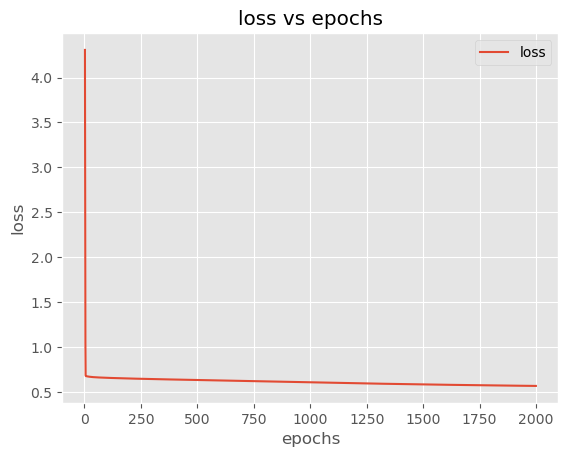

In [41]:
plot_graph(history,'loss')

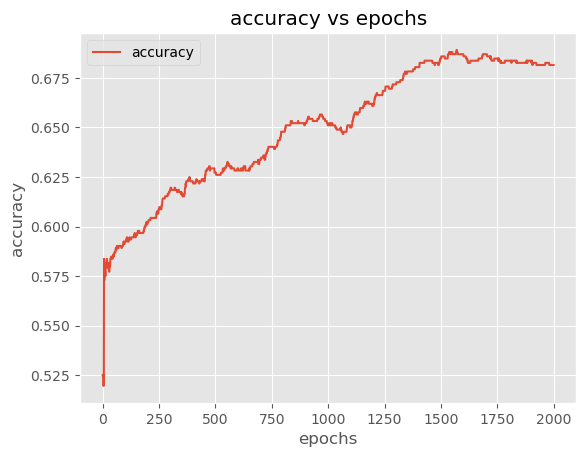

In [42]:
plot_graph(history,'accuracy')

In [43]:
class LogisticRegression():
    
    def __init__(self,lr,iterations):
        
        self.lr = lr
        self.iterations = iterations
        
    def sigmoid(self,x):
        
        return 1 / (1 + np.exp(-x))
        
    def fit(self,X,Y):
        
        samples_num , features_num = X.shape
        
        self.weights = np.random.rand(features_num)
        self.bais = 1
        
        for i in range(self.iterations):
            y_pred = np.dot(X,self.weights) + self.bais
            y_pred = self.sigmoid(y_pred)
            
            error = y_pred - Y
            dW =   np.sum(2*X.T.dot(error)) / samples_num
            db = np.sum(error) / samples_num
            
            self.weights -=  dW * self.lr
            self.bais -=  db * self.lr
    
    def predict(self,X):
        net = np.dot(X,self.weights) + self.bais
        net = self.sigmoid(net)
        net = np.round(net)
        return net
    
    def get_accuracy(self,y_true,y_pred):
        correct= 0
        total = len(y_true)
        
        for i in range(total):
            if y_true[i] == y_pred[i]:
                correct +=1
        
        
        accuracy = correct / total
        
        return accuracy

In [44]:
lg = LogisticRegression(0.001,1000)

In [45]:
x_train,x_test,y_train,y_test = train_test_split(scaled_data.values,target.values.squeeze(),test_size=0.2,random_state=42)

In [46]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((920, 18), (231, 18), (920,), (231,))

In [47]:
lg.fit(x_train,y_train)

In [48]:
y_pred = lg.predict(x_train)
print("Training Accuracy is ",lg.get_accuracy(y_train,y_pred))

Training Accuracy is  0.43369565217391304


In [49]:
y_pred = lg.predict(x_test)
print("Training Accuracy is ",lg.get_accuracy(y_test,y_pred))

Training Accuracy is  0.47619047619047616
